In [1]:
import sympy as sym

# Non-asymptotic moment bounds for random variables rounded to non-uniformly spaced sets

Tyler Chen



$\newcommand{\flx}{\lfloor x\rfloor}
\newcommand{\clx}{\lceil x\rceil}
\newcommand{\flc}{\lfloor c\rfloor}
\newcommand{\clc}{\lceil c\rceil}
\newcommand{\err}{\operatorname{err}}
\newcommand{\rd}{\operatorname{rd}}
\newcommand{\d}{\mathrm{d}}
\newcommand{\EE}{\mathbb{E}}$

## Lemma 2

### Round to nearest
By symmetry, assume that $c'$ is $\lfloor c\rfloor$. Then we want to show
$$
\left|\int_{\flc}^{c'} \err(x)^k \d{x} \right|
= \left|\int_{\flc}^{c'} |\flc-x|^k \d{x} \right|
= \frac{|c'-\flc|^{k+1}}{k+1}
$$


Verify:
$$
\left( \left|\int_{\flc}^{c'} |\flc-x|^k \d{x} \right| \right) 
\bigg/
\left( |c'-\flc|^{k+1} \right)
= \frac{1}{k+1}
$$

In [2]:
x = sym.Symbol('x')
c_p = sym.Symbol("c'")
c_f = sym.Symbol('\lfloor c \\rfloor')
k = sym.Symbol('k',positive=True,odd=True)

err_k = (x-c_f)**k

err_k_int = sym.integrate(err_k, (x,c_f,c_p)) 

In [3]:
sym.simplify(err_k_int / (c_p-c_f)**(k+1))

1/(k + 1)

### Stochastic round

$$
\EE[ \err(x)^k ]
=  ( \flx - x)^k \left( 1- \frac{x-\flx}{\clx - \flx} \right)
+  (\clx - x)^k \left( \frac{x-\flx}{\clx - \flx} \right)
$$

$$
\int_{\flc}^{\bar{c}} | \EE[\err(x)]^k| \d{x} 
= \frac{1-(k+3)2^{-(k+1)}}{k^2+3k+2}|\clc-\flc|^{k+1}
$$

Verify:
$$
\left( \int_{\flc}^{\bar{c}} | \EE[\err(x)]^k| \d{x} \right)
\bigg/
\left( |\clc-\flc|^{k+1} \right)
= \frac{1-(k+3)2^{-(k+1)}}{k^2+3k+2}
$$

In [4]:
x = sym.Symbol('x')
c_f = sym.Symbol('\lfloor c \\rfloor')
c_c = sym.Symbol('\lceil c \\rceil')
c_b = sym.Symbol('\bar{c}')

k = sym.Symbol('k',positive=True,odd=True)
z = sym.Symbol('z',positive=True)

c_b = (c_f+c_c)/2
exp_err_k = (c_f-x)**k*(1-(x-c_f)/(c_c-c_f)) + (c_c-x)**k*((x-c_f)/(c_c-c_f))

exp_err_k_int = sym.integrate(exp_err_k, (x,c_f,c_b))

In [5]:
sym.simplify(sym.expand(sym.simplify( exp_err_k_int / (c_c-c_f)**(k+1)  ).subs(c_c-c_f,z)))

2**(-k - 1)*(2**(k + 1) - k - 3)/(k**2 + 3*k + 2)

## Lemma 6

### Round to nearest

$$
\left|\int_{\flc}^{\clc} |\err(x)|^k \d{x} \right|
= 2\left|\int_{\flc}^{\bar{c}} |\err(x)|^k \d{x} \right|
= \frac{2}{k+1} \int_{\flc}^{\bar{c}} \left| \err \left( \frac{\flc+\clc}{2} \right) \right| \d{x} 
= \frac{1}{k+1}\int_{\flc}^{\clc} \left| \err \left( \frac{\flc+\clc}{2} \right) \right| \d{x} 
$$


Verify:
$$
\left( \left|\int_{\flc}^{\bar{c}} |\err(x)|^k \d{x} \right| \right) 
\bigg/ 
\left(\int_{\flc}^{\bar{c}} \left| \err \left( \frac{\flc+\clc}{2} \right) \right| \d{x} \right)
=\frac{1}{k+1} 
$$

In [6]:
x = sym.Symbol('x')
c = sym.Symbol('c')
c_f = sym.Symbol('\lfloor c \\rfloor')
c_b = sym.Symbol('\bar{c}')
k = sym.Symbol('k',positive=True)

c_b = (c_f+c_c)/2

err_cb = (c_b-c_f)**k
abs_err_k = (x-c_f)**k

abs_err_k_int = sym.integrate(abs_err_k, (x,c_f,c_b))
err_cfcc_int = sym.integrate(err_cb, (x,c_f,c_b))

In [7]:
sym.simplify(abs_err_k_int/err_cfcc_int)

1/(k + 1)

### Stochastic round

$$
\EE[ | \err(x) |^k ]
=  ( x - \flx)^k \left( 1- \frac{x-\flx}{\clx - \flx} \right)
+  (\clx - x)^k \left( \frac{x-\flx}{\clx - \flx} \right)
= 
$$

$$
\left|\int_{\flc}^{\clc} \EE[|\err(x)|^k] \d{x} \right|
= 2\left|\int_{\flc}^{\bar{c}} \EE[|\err(x)|^k] \d{x} \right|
= \frac{2}{k^2+3k+2} | \flc - \clc|^{k+1}
$$


Verify:
$$
\left( 2\left|\int_{\flc}^{\bar{c}} \EE[|\err(x)|^k] \d{x} \right| \right)
\bigg/
\left( | \flc - \clc|^{k+1} \right)
= \frac{2}{k^2+3k+2} 
$$

In [8]:
x = sym.Symbol('x')
c_f = sym.Symbol('\lfloor c \\rfloor')
c_c = sym.Symbol('\lceil c \\rceil')
c_b = sym.Symbol('\bar{c}')
k = sym.Symbol('k',positive=True,odd=True)

c_b = (c_f+c_c)/2

exp_abs_err_k = (x-c_f)**k*(1-(x-c_f)/(c_c-c_f)) + (c_c-x)**k*((x-c_f)/(c_c-c_f))

exp_abs_err_k_int = 2*sym.integrate(exp_abs_err_k, (x,c_f,c_b))

In [9]:
sym.simplify(exp_abs_err_k_int/(c_c - c_f)**(k+1))

2/(k**2 + 3*k + 2)

## Lemma 7

### Round to nearest

$$
\left|\int_{\flc}^{\clc} |\err(x)|^k \d{x} \right|
= 2 \left|\int_{\flc}^{\bar{c}} |\err(x)|^k \d{x} \right|
= \frac{2}{(k+1)} \left( \frac{\flc-\clc}{2} \right)^{k+1}
$$

Verify:
$$
\left( 2 \left|\int_{\flc}^{\bar{c}} |\err(x)|^k \d{x} \right| \right)
\bigg/
\left( \left( \frac{\flc-\clc}{2} \right)^{k+1} \right)
= \frac{2}{(k+1)} 
$$

In [10]:
x = sym.Symbol('x')
c = sym.Symbol('c')
c_f = sym.Symbol('\lfloor c \\rfloor')
c_b = sym.Symbol('\bar{c}')
z = sym.Symbol('z',positive=True)

c_b = (c_f+c_c)/2
k = sym.Symbol('k',positive=True)


abs_err_k = (x-c_f)**k
abs_err_k_int = 2*sym.integrate(abs_err_k, (x,c_f,c_b))

In [11]:
sym.simplify( abs_err_k_int / ((c_c - c_f)/2)**(k+1) )

2/(k + 1)

### Stochastic round

$$
\EE[ | \err(x) |^k ]
=  ( x - \flx)^k \left( 1- \frac{x-\flx}{\clx - \flx} \right)
+  (\clx - x)^k \left( \frac{x-\flx}{\clx - \flx} \right)
$$

$$
\left|\int_{\flc}^{\clc} \EE[|\err(x)|^k] \d{x} \right|
= 2\left|\int_{\flc}^{\bar{c}} \EE[|\err(x)|^k] \d{x} \right|
= \frac{2}{k^2+3k+2} | \flc - \clc|^{k+1}
$$


Verify:
$$
\left( 2\left|\int_{\flc}^{\bar{c}} \EE[|\err(x)|^k] \d{x} \right| \right)
\bigg/
\left( | \flc - \clc|^{k+1} \right)
= \frac{2}{k^2+3k+2} 
$$

In [12]:
x = sym.Symbol('x')
c_f = sym.Symbol('\lfloor c \\rfloor')
c_c = sym.Symbol('\lceil c \\rceil')
c_b = sym.Symbol('\bar{c}')

k = sym.Symbol('k',positive=True,odd=True)
z = sym.Symbol('z',positive=True)

c_b = (c_f+c_c)/2

exp_abs_err_k = (x-c_f)**k*(1-(x-c_f)/(c_c-c_f)) + (c_c-x)**k*((x-c_f)/(c_c-c_f))

exp_abs_err_k_int = 2*sym.integrate(exp_abs_err_k, (x,c_f,c_b))

In [13]:
sym.simplify(exp_abs_err_k_int/(c_c - c_f)**(k+1))

2/(k**2 + 3*k + 2)

## Example

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import scipy as sp
from scipy import integrate,stats

mpl.rc('text', usetex=True)
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath,amssymb}']
plt.rc('font', family='serif')

In [15]:
def err(x,F):
    if np.isscalar(x):
        rdx = F[np.argmin(np.abs(x-F))]
        
    else:
        rdx = F[np.argmin(np.abs(x[:,None] - F[None,:]),axis=1)]
    return rdx - x

def err_stoch(x,F,k=1):
    if np.isscalar(x):
        idx = np.argmax(F>x)
        flx = F[idx-1]
        clx = F[idx]
        
    else:
        idx = np.argmax(F[None,:]>x[:,None],axis=1)
        flx = F[idx-1]
        clx = F[idx]
        
    return (flx-x)**k*(1-(x-flx)/(clx-flx))+(clx-x)**k*((x-flx)/(clx-flx))

def err_abs_stoch(x,F,k=1):
    if np.isscalar(x):
        idx = np.argmax(F>x)
        flx = F[idx-1]
        clx = F[idx]
        
    else:
        idx = np.argmax(F[None,:]>x[:,None],axis=1)
        flx = F[idx-1]
        clx = F[idx]
        
    return (x-flx)**k*(1-(x-flx)/(clx-flx))+(clx-x)**k*((x-flx)/(clx-flx))

## Asympottics

In [10]:
ns = np.unique(np.logspace(1,2,20).astype('int'))

integral = {}
integral_stoch = {}
integral_exact = {}

ks = [1,2,3]

for k in ks:
    for n in ns:
        en = np.zeros(n)
        en[-1] = 1

        F = np.polynomial.chebyshev.chebroots(en)

        nu = lambda x: 1/(np.pi*np.sqrt((1+x)*(1-x)))

        discont = F
        integral[n,k] = 0
        integral_stoch[n,k] = 0

        f = lambda x: sp.stats.beta(10,10,loc=-1,scale=2).pdf(x)

        for j in range(len(discont)-1):

            pi,pe = sp.integrate.quad(lambda x: f(x)*np.abs(err(x,F))**k,discont[j],discont[j+1],epsabs=1e-5,epsrel=1e-3)
            pi_stoch,pe_stoch = sp.integrate.quad(lambda x: f(x)*err_abs_stoch(x,F,k=k),discont[j],discont[j+1],epsabs=1e-5,epsrel=1e-3)

            integral[n,k]+=pi
            integral_stoch[n,k]+=pi_stoch

    integral_exact[k],_ = sp.integrate.quad(lambda x: f(x)*nu(x)**(-k),-1,1)

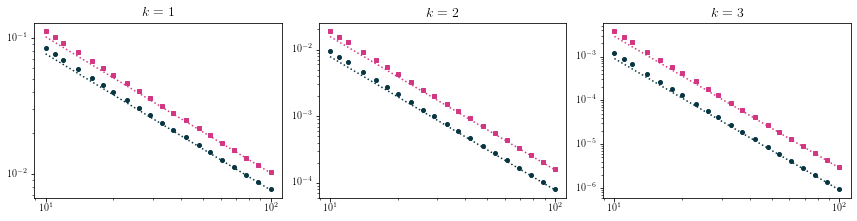

In [11]:
fig,axs = plt.subplots(1,len(ks),figsize=(12,3),sharex=True)
fig.tight_layout()

for i,k in enumerate(ks):
    axs[i].plot(ns,[integral[n,k] for n in ns],marker='o',markersize=4,ls='None',color='#073642')
    axs[i].plot(ns,(k+1)**(-1)*integral_exact[k]*(2.*ns)**(-k),ls=':',color='#073642')
    
    axs[i].plot(ns,[integral_stoch[n,k] for n in ns],marker='s',markersize=4,ls='None',color='#d33682')
    axs[i].plot(ns,2*(k**2+3*k+2)**(-1)*integral_exact[k]*(1.*ns)**(-k),ls=':',color='#d33682')
    
    
    axs[i].set_yscale('log')
    axs[i].set_title(f'$k={k}$',fontsize=14)


axs[0].set_xscale('log')
                   
plt.savefig('asympototic_ranges.pdf',bbox_inches='tight')

## Semicircle density

In [12]:
mu = 0
r = 1

def fX(x,mu=mu,r=r):
    return (mu-r<=x)*(x<=mu+r)*(2/(np.pi*r**2))*np.sqrt(np.abs(r**2-(x-mu)**2))

In [13]:
mesh_sizes = np.logspace(-1,np.log10(.5),300)

num_meshes = len(mesh_sizes)
num_shifts = 50
    
def get_integral(f):

    integral = np.zeros((num_meshes,num_shifts))
    error = np.zeros((num_meshes,num_shifts))

    for i,h in enumerate(mesh_sizes):
        if i%50==0:
            print(i)
            
        grid = np.arange(-(r//h+2)*h,(r//h+3)*h,h) # ensure that grid is wide enough, and passes through zero
        shifts = np.linspace(0,h,num_shifts)

        for j,a in enumerate(shifts):

            F = a + grid
            discont = np.unique(np.hstack([F,F-h/2,[mu-r,mu+r]]))

            for k in range(len(discont)-1):
                pi,pe = sp.integrate.quad(lambda x: f(x,F),discont[k],discont[k+1],epsabs=1e-5,epsrel=1e-3)
                integral[i,j] += pi
                error[i,j] += pe
    return integral,error           

In [14]:
integral = {}
error = {}

integral['err'],error['err'] = get_integral(lambda x,F: err(x,F)*fX(x))

0
50
100
150
200
250


In [15]:
integral['x_err'],error['x_err'] = get_integral(lambda x,F: x*err(x,F)*fX(x))

0
50
100
150
200
250


In [16]:
integral['err2'],error['err2'] = get_integral(lambda x,F: err(x,F)**2*fX(x))

0
50
100
150
200
250


In [17]:
integral['var_diff'] = 2 * integral['x_err'] + integral['err2'] - integral['err']**2

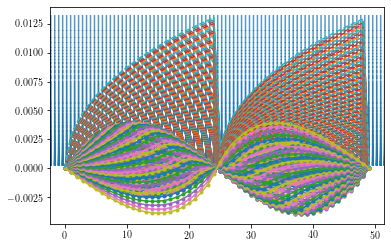

In [18]:
for i,h in enumerate(mesh_sizes):
    shifts = np.linspace(0,h,num_shifts)

    plt.plot(integral['err'][i],marker='.')
    
    plt.axhline((1/2)*fX(r-h/2)*(h/2)**2,linestyle=':')
    
    plt.plot((1/2)*fX(r-np.mod(shifts,h/2))*(h/2)**2,linestyle='--')



In [19]:
# err(X)
#err_max = np.max(integral['err'],axis=1)
#err_min = np.zeros_like(integral['err'][:,0]) # the value of this integral crosses zero so we set min of absolute value to zero for plotting convenience
#err_min = np.min(integral['err'],axis=1)

err_max = np.max(np.abs(integral['err']),axis=1)
err_min = np.min(np.abs(integral['err']),axis=1)
err_min[np.min(integral['err'],axis=1)<=0] = 0

err_ave = (err_max+err_min)/2
err_del = (err_max-err_min)/2

delta = mesh_sizes / 2

err_a = delta
err_b = (1/(np.pi*r))*(delta)**2
#err_c = (1/2)*fX(delta-r)*(delta)**2

# X err(X)

#x_err_max = np.max(integral['x_err'],axis=1)
#x_err_min = np.zeros_like(integral['x_err'][:,0]) # the value of this integral crosses zero so we set min of absolute value to zero
#x_err_min = np.min(integral['x_err'],axis=1)

x_err_max = np.max(np.abs(integral['x_err']),axis=1)
x_err_min = np.min(np.abs(integral['x_err']),axis=1)
x_err_min[np.min(integral['x_err'],axis=1)<=0] = 0

x_err_ave = (x_err_max+x_err_min)/2
x_err_del = (x_err_max-x_err_min)/2

x_err_a = (4*r)/(3*np.pi)*delta
x_err_b = 2*(1/(np.pi))*(delta)**2

#c_star = .578649
#x_err_c = 2*2*(2*(c_star+delta)-r)*fX(2*(c_star+delta)-r)*(delta)**2*(delta < (1/2+np.sqrt(2)/4)*r - c_star) + (delta > (1/2+np.sqrt(2)/4)*r - c_star)*2*(1/(np.pi))*(delta)**2

idxs = np.argmax(np.abs(integral['x_err']),axis=1)
shifts = np.mod(mesh_sizes * idxs / num_shifts, delta)

# err(X)^2

err2_max = np.max(np.abs(integral['err2']),axis=1)
err2_min = np.min(np.abs(integral['err2']),axis=1)
err2_min[np.min(integral['err2'],axis=1)<=0]=0

err2_ave = (err2_max+err2_min)/2
err2_del = (err2_max-err2_min)/2

dd = np.logspace(np.log10(delta[0]),np.log10(delta[-1]),100)

err2_a = delta**2
err2_b = (1/3)*(delta)**2 + (8/(3*np.pi*r))*delta**3
err2_c = (1/3)*(delta)**2 - (8/(3*np.pi*r))*delta**3

idxs = np.argmax(np.abs(integral['err2']),axis=1)
shifts = np.mod(mesh_sizes * idxs / num_shifts, delta)

# var(X)

var_diff_max = np.max(np.abs(integral['var_diff']),axis=1)
var_diff_min = np.min(np.abs(integral['var_diff']),axis=1)
var_diff_min[np.min(integral['var_diff'],axis=1)<=0]=0

var_diff_ave = (var_diff_max+var_diff_min)/2
var_diff_del = (var_diff_max-var_diff_min)/2

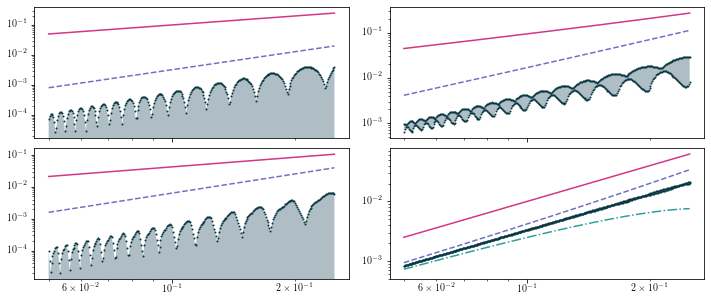

In [20]:
fig,axs = plt.subplots(2,2,figsize=(12,5),sharex=True)
fig.subplots_adjust(wspace=.13)
fig.subplots_adjust(hspace=.08)

# |E[rd(X)] - E[X]|
axs[0,0].plot(delta,err_a,linestyle='-',color='#d33682')
axs[0,0].plot(delta,err_b,linestyle='--',color='#6c71c4')
axs[0,0].fill_between(delta,err_min,err_max,linestyle='None',facecolor='#afbec4')
axs[0,0].plot(delta,err_max,linestyle='None',marker='.',color='#073642',markersize=2,label=r'$|\mathbb{E}[\operatorname{rd}(X)] - \mathbb{E}[X]|$')
#axs[0,0].set_title(r'$|\mathbb{E}[\operatorname{rd}(X)] - \mathbb{E}[X]|$',fontsize=14)

#axs[0,0].errorbar(delta,err_ave,yerr=err_del,\
#                  capsize=3, capthick=2, elinewidth=.5, linestyle='None', color='#073642',\
#                  label=r'$|\mathbb{E}[\operatorname{rd}(X)] - \mathbb{E}[X]|$')
axs[0,0].plot(delta,0*delta,linestyle='-',linewidth=3,color='#859900')


# | V[rd(X)] - V[X] |
axs[0,1].plot(delta,2*x_err_a + np.max(np.vstack([err2_a,err_a**2]),axis=0),linestyle='-',color='#d33682')
axs[0,1].plot(delta,2*x_err_b + np.max(np.vstack([err2_b,err_b**2]),axis=0),linestyle='--',color='#6c71c4')
#axs[0,1].plot(delta,(1/3)*(delta)**2,linestyle='-',linewidth=3,color='#859900')
axs[0,1].fill_between(delta,var_diff_min,var_diff_max,linestyle='None',facecolor='#afbec4')
axs[0,1].plot(delta,var_diff_max,linestyle='None',marker='.',color='#073642',markersize=2,label=r'$|\mathbb{V}[\operatorname{rd}(X)] - \mathbb{V}[X]|$')
axs[0,1].plot(delta,var_diff_min,linestyle='None',marker='.',color='#073642',markersize=2)
#axs[0,1].set_title(r'$|\mathbb{V}[\operatorname{rd}(X)] - \mathbb{V}[X]|$',fontsize=14)

#axs[0,1].errorbar(delta,var_diff_ave,yerr=var_diff_del,\
#                  capsize=3, capthick=2, elinewidth=.5, linestyle='None', color='#073642',\
#                  label=r'$|\mathbb{V}[\operatorname{rd}(X)] - \mathbb{V}[X]|$')


# |E[X err(X)]|
axs[1,0].plot(delta,x_err_a,linestyle='-',color='#d33682')
axs[1,0].plot(delta,x_err_b,linestyle='--',color='#6c71c4')
axs[1,0].fill_between(delta,x_err_min,x_err_max,linestyle='None',facecolor='#afbec4')
axs[1,0].plot(delta,x_err_max,linestyle='None',marker='.',color='#073642',markersize=2,label=r'$|\mathbb{E}[X\operatorname{err}(X)]|$')
#axs[1,0].set_title(r'$|\mathbb{E}[X\operatorname{err}(X)]|$',fontsize=14)

#axs[1,0].errorbar(delta,x_err_ave,yerr=x_err_del,\
#                  capsize=3, capthick=2, elinewidth=.5, linestyle='None', color='#073642',\
#                  label=r'$|\mathbb{E}[X\operatorname{err}(X)]|$')

# |E[err(X)^2]|
axs[1,1].plot(delta,err2_a,linestyle='-',color='#d33682')
axs[1,1].plot(delta,err2_b,linestyle='--',color='#6c71c4')
axs[1,1].plot(delta,err2_c,linestyle='-.',color='#2aa198')
axs[1,1].fill_between(delta,err2_min,err2_max,linestyle='None',facecolor='#afbec4')
axs[1,1].plot(delta,err2_max,linestyle='None',marker='.',color='#073642',markersize=2,label=r'$\mathbb{E}[\operatorname{err}(X)^2]$')
axs[1,1].plot(delta,err2_min,linestyle='None',marker='.',color='#073642',markersize=2)
#axs[1,1].set_title(r'$\mathbb{E}[\operatorname{err}(X)^2]$',fontsize=14)

#axs[1,1].errorbar(delta,err2_ave,yerr=err2_del, capsize=3, capthick=2, elinewidth=.5, linestyle='None', color='#073642', label=r'$\mathbb{E}[\operatorname{err}(X)^2]$')


# | V[rd(X)] - V[X] -delta^2/3 |
#axs[1,1].plot(delta,2*x_err_b + err2_c,linestyle='-.',color='#2aa198')
#axs[1,1].plot(delta,-2*x_err_b - err_b**2 ,linestyle='-.',color='#2aa198')
#axs[1,1].plot(delta,0*delta,linestyle='-',linewidth=3,color='#859900')
#axs[1,1].errorbar(delta,var_diff_ave-(1/3)*(delta)**2,yerr=var_diff_del, capsize=3, capthick=2, elinewidth=.5, linestyle='None', color='#073642', label=r'$\Delta_{\mathbb{V}}-\delta^2/3$')#$|\mathbb{V}[\operatorname{rd}(X)] - \mathbb{V}[X]|$')

axs[0,0].set_xscale('log')

axs[0,0].set_yscale('log')#,linthreshy=1e-4)
#axs[0,0].set_ylim(-1e-6,None)

axs[0,1].set_yscale('log')
axs[1,0].set_yscale('log')#,linthreshy=1e-4)
axs[1,1].set_yscale('log')
axs[1,1].set_ylim(5e-4,None)

#axs[1,1].set_yscale('symlog',linthreshy=1e-4)

#axs[1,0].set_xlabel(r'additive error bound $\delta$')
#axs[1,1].set_xlabel(r'additive error bound $\delta$')
#axs[1,2].set_xlabel(r'additive error bound $\delta$')

# define legend styles
legend_elements = [Line2D([0], [0], linestyle='-', color='#d33682', label='bound (a)', lw=2.5),
                   Line2D([0], [0], linestyle='--', color='#6c71c4', label='bound (b)', lw=2.5),
                   Line2D([0], [0], linestyle='-.', color='#2aa198', label='bound (c)', lw=2.5),
                   #Line2D([0], [0], linestyle='-', color='#859900', label="Sheppard's correction", lw=6)
                  ]
                   
#legend1 = axs[1,1].legend(handles=legend_elements,loc="upper left",fontsize=12,framealpha=1)

#axs[0,0].legend(loc='lower right', fontsize=12,framealpha=1)
#axs[0,1].legend(loc='lower right', fontsize=12,framealpha=1)
#axs[1,0].legend(loc='lower right', fontsize=12,framealpha=1)
#axs[1,1].legend(loc='lower right', fontsize=12,framealpha=1)


#plt.legend(andles=legend_elements,loc="lower right",fontsize=12)
#axs[1,1].add_artist(legend1)


plt.savefig('all_semicircle.pdf',bbox_inches='tight')